# K Nearest Neighbours (KNN)

## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importing dataset

In [4]:
df = pd.read_excel('KNN_Credit_Score_Loan_Data.xlsx')
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
df.head()

,Existing Loans,Credit Score,Loan Given
0,0,84,0
1,0,100,0
2,0,100,0
3,0,106,0
4,0,112,0


In [5]:
print(X)
print(Y)

[[  0  84]
 [  0 100]
 [  0 100]
 [  0 106]
 [  0 112]
 [  0 112]
 [  0 112]
 [  0 117]
 [  0 117]
 [  0 123]
 [  0 123]
 [  0 123]
 [  0 128]
 [  0 128]
 [  0 128]
 [  0 145]
 [  0 145]
 [  0 150]
 [  0 156]
 [  0 156]
 [  0 167]
 [  0 178]
 [  0 178]
 [  0 178]
 [  0 184]
 [  0 184]
 [  0 189]
 [  0 195]
 [  0 200]
 [  0 200]
 [  0 212]
 [  0 217]
 [  0 217]
 [  0 217]
 [  0 228]
 [  0 234]
 [  0 234]
 [  0 239]
 [  0 239]
 [  0 239]
 [  0 239]
 [  0 239]
 [  0 245]
 [  0 262]
 [  0 262]
 [  0 262]
 [  0 267]
 [  0 278]
 [  0 278]
 [  0 278]
 [  0 284]
 [  0 284]
 [  0 289]
 [  0 289]
 [  0 289]
 [  0 295]
 [  0 300]
 [  0 300]
 [  0 306]
 [  0 306]
 [  0 306]
 [  0 317]
 [  0 317]
 [  0 323]
 [  0 323]
 [  0 323]
 [  0 328]
 [  0 334]
 [  0 334]
 [  0 334]
 [  0 334]
 [  1 339]
 [  0 339]
 [  1 345]
 [  0 350]
 [  1 350]
 [  0 362]
 [  0 362]
 [  0 362]
 [  1 362]
 [  1 367]
 [  0 378]
 [  0 389]
 [  0 389]
 [  0 395]
 [  0 395]
 [  0 395]
 [  0 395]
 [  0 395]
 [  0 400]
 [  0 400]

## Splitting the dataset into Training & Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

## KNN Training on Training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

## Predicting

In [12]:
print(classifier.predict(sc.transform([[3, 730]])))

[0]


## Predicting Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[36  4]
 [ 7 21]]


In [23]:
accuracy_score(Y_test,y_pred)

0.8382352941176471

## Visualizing Test Set results

/var/folders/hy/w9rnt0zs6ll1g70czymsybv40000gn/T/ipykernel_855/2765724268.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


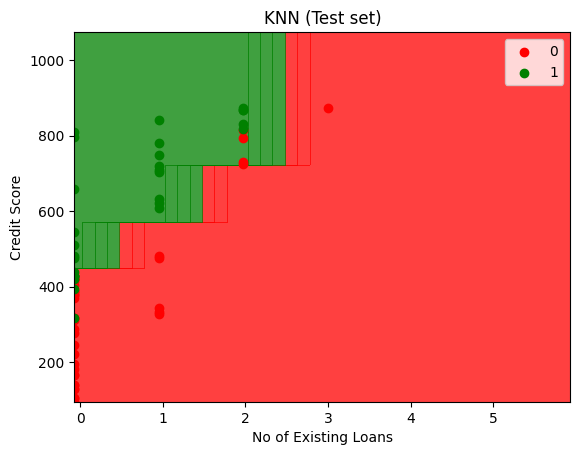

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()

## Visualising Training set results

/var/folders/hy/w9rnt0zs6ll1g70czymsybv40000gn/T/ipykernel_855/3822617757.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


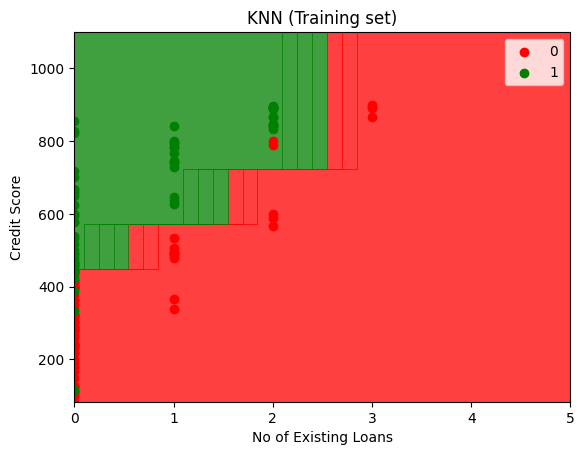

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()